# Raw Files Processign and Instruction
If you wish to download the raw files from IEEE dataport and verify it your own, in this Notebook we are going to provide documentations.

<img src="../src/img/BLE-WABN.png" width="400" >

## File structure

After Downloading the Raw files for either SDR_1 and SDR_2 you see these folders:
- offBody
  - high-tx-power-9dbm
  - low-tx-power-3dbm
- onBody
  - iter_1 (Antenna 1 -> left,  Antenna 2 -> right)
  - iter_2 (Antenna 1 -> right, Antenna 2 -> left)
Note SDR_2 is the same set of experiment repeated for a second SDR to analyze the effect, if any, of the reciever.


## iq and tindx files
In each sub folder you will find two set of .iq and .tindx files for every setup representing the two synchronized SDR channels (Antennas). For example:<br />
Antenna 1:<br />
- x310-jan-14-dvc-1-pos-1_2440000000.0_100000000.0_31.5_2_1_1.iq<br />
- x310-jan-14-dvc-1-pos-1_2440000000.0_100000000.0_31.5_2_1_1.iq.tindx<br />

Antenna 2:<br />
- x310-jan-14-dvc-1-pos-1_2440000000.0_100000000.0_31.5_2_1_2.iq<br />
- x310-jan-14-dvc-1-pos-1_2440000000.0_100000000.0_31.5_2_1_2.iq.tindx<br />
  
<img src="../src/img/USRP_x310.png" width="400" >

### Naming Breakdown:
<pre>
{SDR} - {mmm} - {dd} - dvc - {#} -pos- {#} _ {Fc (Hz)} _ {Fs (Sps)} _ {Gain} _ {AcquisitionTime (s)} _ {Internal} _ {SDR channel AKA. Antenna}<br />
x310  -  jan  -  14  - dvc -  1  -pos-  1   _   244..  _    100..    _ 31.5  _           2           _     1      _             2
</pre>

## what is tindx file

As The image below shows the pipline of recoding, RSS thresholding was carried out. By removing the samples between each RSS spike above the average we reduced the size required to store the data. To keep the timing information we stored the sample index of when the frame starts and stops. 

<img src="../src/img/dataProcessing.png" width="400" >

For example, list [1069853,1108596,1219839,1258600, ...] shows that the first RSS spike was from sample 1069853 to  1108596 which is about 38743 samples and at 100 MSps translates to 387 us.


In iq files each RSS spike recording (IQ samples) are seperated by zeros. Therfore finding IQ samples between zeros will provide each spike that we will name them as frames from now on.



# How to read an iq files?

The built in python tool will read the iq file along with the tindx file and has multiple functionality that we are going to look at them in this notebook.


In [1]:
import sys

sys.path.append('../')
import src.dataProcessing as dp

utils = dp.Utills() 
path = "../DataSet/SDR_1/offBody/high-tx-PWR-9dbm/x310-jan-13-dvc-1-pos-1_2440000000.0_100000000.0_31.5_2_0_1.iq"

# automatically detect the tindex file corresponding to the iq file
IQ,TINDX = utils.readFile(file=path)

File name has a correct format!


## Let's plot the IQ 

IQ samples were recorded after the server and client connect. during this period the connection events take place that look like the image below.

<img src="../src/img/ConnectionEvent.png" width = 800px>

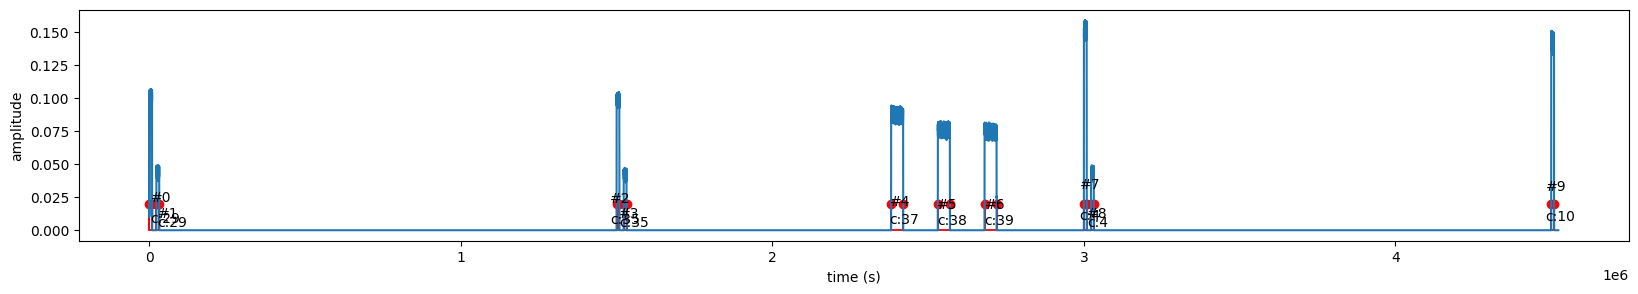

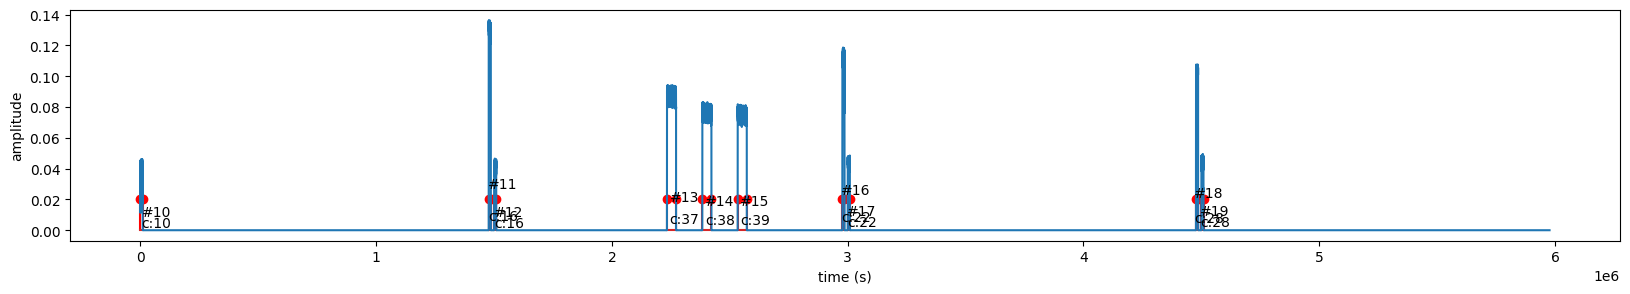

In [2]:
# plotting the iq file and spacing the frames by using the tindex file
# the info shows the channel that the frame was transmitted on (BLE has 40 different channels)
######################
# the X axis is the time in samples where is 1 sample = 1/1000000000 seconds
######################
# batch is the number of frames to be plotted at once
# frameShowLimit is the number of frames to be plotted in total (setting it to -1 will plot all the frames)
# Setting fft to True will plot the fft of each individual frame after the iq plot
# compression_ratio is the number of samples to be skipped during silent time (skipping zeros) (1 means no compression)
utils.plotter(IQdata=IQ,tindx=TINDX, batch=10, frameShowLimit=20, info= True, fft= False, compression_ratio=1)

### Looking at both channels

It is really interesting to look at the two different antenna recording the same signal. Since BLE uses channel hopping. The selective fading changes the channel attenuation for every different packets.

<img src="../src/img/offBody.png" width = 400px >

File name has a correct format!
File name has a correct format!


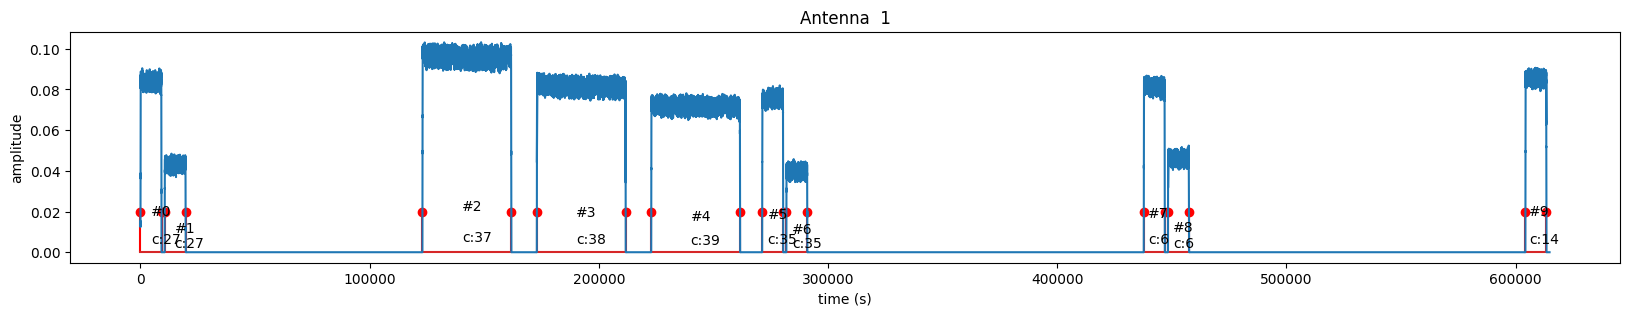

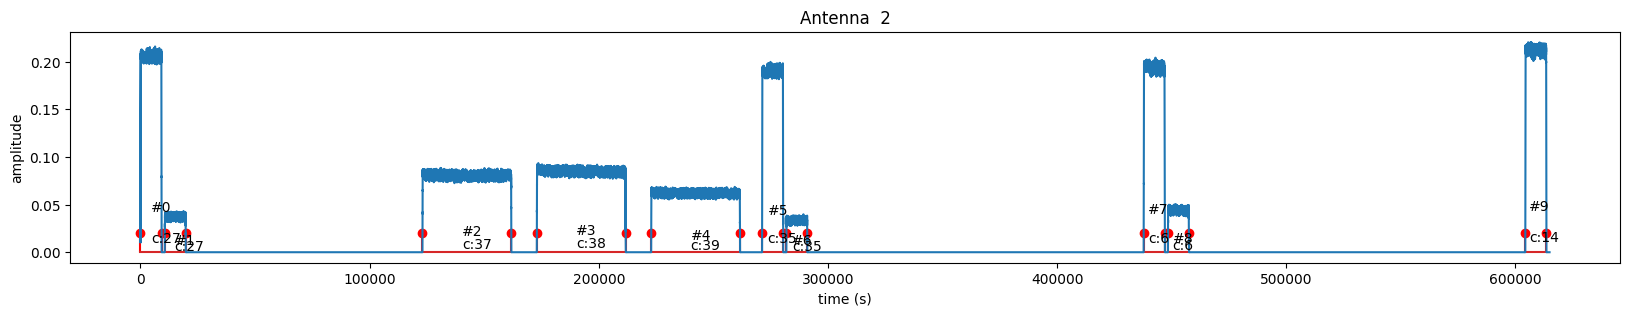

In [3]:
path1 = "../DataSet/SDR_1/offBody/high-tx-PWR-9dbm/x310-jan-13-dvc-1-pos-7_2440000000.0_100000000.0_31.5_2_0_1.iq"
path2 = "../DataSet/SDR_1/offBody/high-tx-PWR-9dbm/x310-jan-13-dvc-1-pos-7_2440000000.0_100000000.0_31.5_2_0_2.iq"

# automatically detect the tindex file corresponding to the iq file
IQ1,TINDX1 = utils.readFile(file=path1)
IQ2,TINDX2 = utils.readFile(file=path2)

# plotting the iq file and spacing the frames by compressing the silent time by 10 times
utils.plotter(IQdata=IQ1,tindx=TINDX1, batch=10, frameShowLimit=10, info= True, fft= False, compression_ratio=10, title="Antenna  1")
utils.plotter(IQdata=IQ2,tindx=TINDX2, batch=10, frameShowLimit=10, info= True, fft= False, compression_ratio=10, title="Antenna  2")

### Extracting the frames using IQ.frameByNumber method


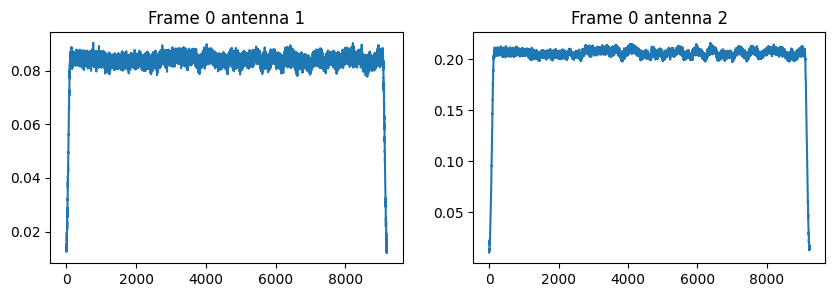

In [4]:
import matplotlib.pyplot as plt
import numpy as np
absFrame1 = np.abs(IQ1.frameByNumber(0))
absFrame2 = np.abs(IQ2.frameByNumber(0))

plt.figure(figsize=(10,3))
plt.subplot(121)
plt.plot(absFrame1)
plt.title("Frame 0 antenna 1")

plt.subplot(122)
plt.plot(absFrame2)
plt.title("Frame 0 antenna 2")

plt.show()



# Extracting the Time index using IQ.tindx

As you the numbers bellow shows, if the RSS is higher we would capture more samples. It happens because the samples passes the threshold earlier for the higher RSS signal.

In [5]:
print("Frame 0 antenna 1 sample length: " , np.diff(IQ1.tindx[0]), ", tindx: " ,IQ1.tindx[0],
"\nFrame 0 antenna 2 sample length: " , np.diff(IQ1.tindx[0]), ", tindx: ",IQ2.tindx[0])


Frame 0 antenna 1 sample length:  [9186.] , tindx:  [286906. 296092.] 
Frame 0 antenna 2 sample length:  [9186.] , tindx:  [286878. 296114.]


## demodulating the Frame using IQ.demodulate
Finding the channel of the BLE fram using the IQ.channelDetection

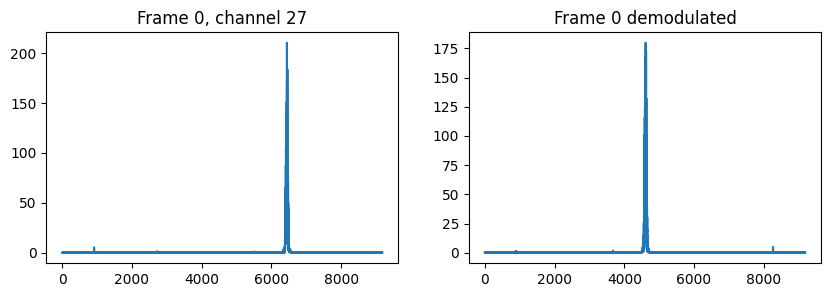

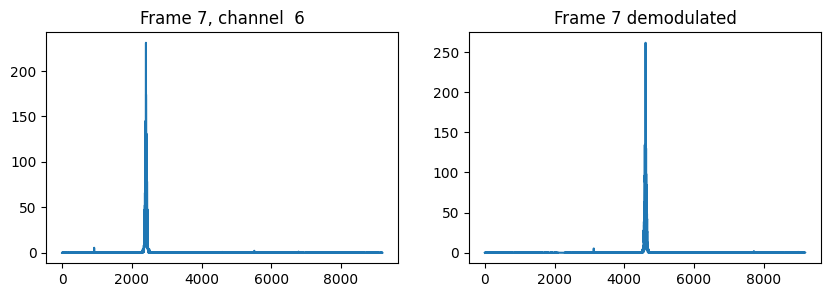

In [6]:
fftFrame1 = IQ1.fft(IQ1.frameByNumber(0))
fftFrame1Demod = IQ1.fft(IQ1.demodulate(0))


### the X axis is not scaled correctly
plt.figure(figsize=(10,3))
plt.subplot(121)
plt.plot(np.abs(fftFrame1))
plt.title(f"Frame 0, channel {IQ1.channelDetection(0)}")

plt.subplot(122)
plt.plot(np.abs(fftFrame1Demod))
plt.title("Frame 0 demodulated")

plt.show()
plt.close()

fftFrame1 = IQ1.fft(IQ1.frameByNumber(7))
fftFrame1Demod = IQ1.fft(IQ1.demodulate(7))


### the X axis is not scaled correctly
plt.figure(figsize=(10,3))
plt.subplot(121)
plt.plot(np.abs(fftFrame1))
plt.title(f"Frame 7, channel  {IQ1.channelDetection(7)}")

plt.subplot(122)
plt.plot(np.abs(fftFrame1Demod))
plt.title("Frame 7 demodulated")

plt.show()
plt.close()

# Recording center frequncy can be off by 1% 
showing the demodulated unwrapped phase of the GFSK we can see that changing the FC will provide a better demodulated signal

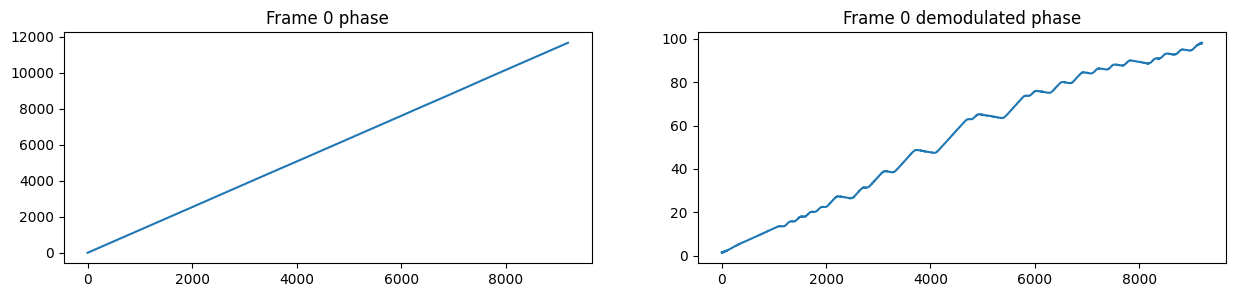

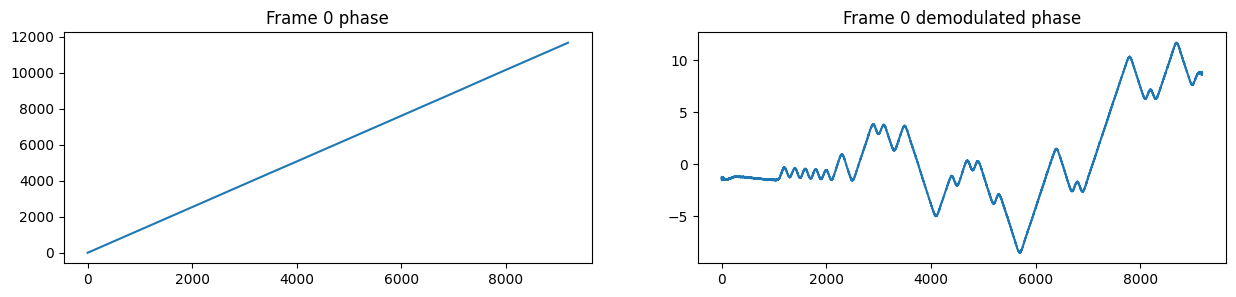

In [7]:
plt.figure(figsize=(15,3))

plt.subplot(121)
plt.plot(np.unwrap(IQ1.phase(0)))
plt.title("Frame 0 phase")
plt.subplot(122)
plt.plot(IQ1.unwrapPhase(IQ1.phase(IQ.demodulate(0))))
plt.title("Frame 0 demodulated phase")
plt.show()


IQ1.Fc= 2440000000.0 - 183000

plt.figure(figsize=(15,3))
plt.subplot(121)
plt.plot(IQ1.unwrapPhase(IQ1.phase(0)))
plt.title("Frame 0 phase")
plt.subplot(122)
plt.plot(IQ1.unwrapPhase(IQ1.phase(IQ1.demodulate(0))))
plt.title("Frame 0 demodulated phase")
plt.show()


# MetaData for any given frame

In [8]:
### there are a lot of defaultarguments in the decode
# IQ1.decode(0,plot=True,)
## correcting the recieiving frequency offset
IQ2.Fc= 2440000000.0 - 173000
# IQ2.decode(0,plot=True)

# print( IQ1.getMetaData(5)['timeTillNextFrame'], IQ2.getMetaData(5)['timeTillNextFrame'])





# IQ1.decode(IQ.demodulate(0), lpf = [1], plot=True, signal= [10,-1])
# plot show a non scaled graph of frequency deviation over time

# IQ1.decode( 0, lpf= IQ1.smooth(window_len=50, window='hanning'),plot = True, title = "hanning", signal= [1100,-100])
# # IQ1.decode( 0, lpf= IQ1.smooth(window_len=50, window='hamming'),plot = True, title = "hamming", signal= [1100,-100])
# # IQ1.decode( 0, lpf= IQ1.smooth(window_len=50, window='bartlett'),plot = True, title = "bartlett", signal= [1100,-100])
# # IQ1.decode( 0, lpf= IQ1.smooth(window_len=50, window='blackman'),plot = True, title = "blackman", signal= [1100,-100])
# x= IQ1.decode( 0, lpf= IQ1.smooth(window_len=50, window='flat'),plot = True, title = "flat", signal= [1100,-100])



In [9]:
# IQ1.getMetaData(IQ1.LEN-1)


# req 0xaa [b3 d3 03 b4] [43 f8] [bf e2 f0]

# res 0xaa  b3 d3 03 b4  [63 f8] [74 82 f0]

######### Req ########### 
#      LLID       NESN    SN    MD  CTEInfo present (CP)   RFU                length
#       0, 1     , 0,      0,    0,           0,           1, 1,       1, 1, 1, 1, 1, 0, 0, 0

######### Res ########### 
#      LLID       NESN    SN    MD  CTEInfo present (CP)   RFU                length
#       0, 1     , 1,      0,    0,           0,           1, 1,       1, 1, 1, 1, 1, 0, 0, 0


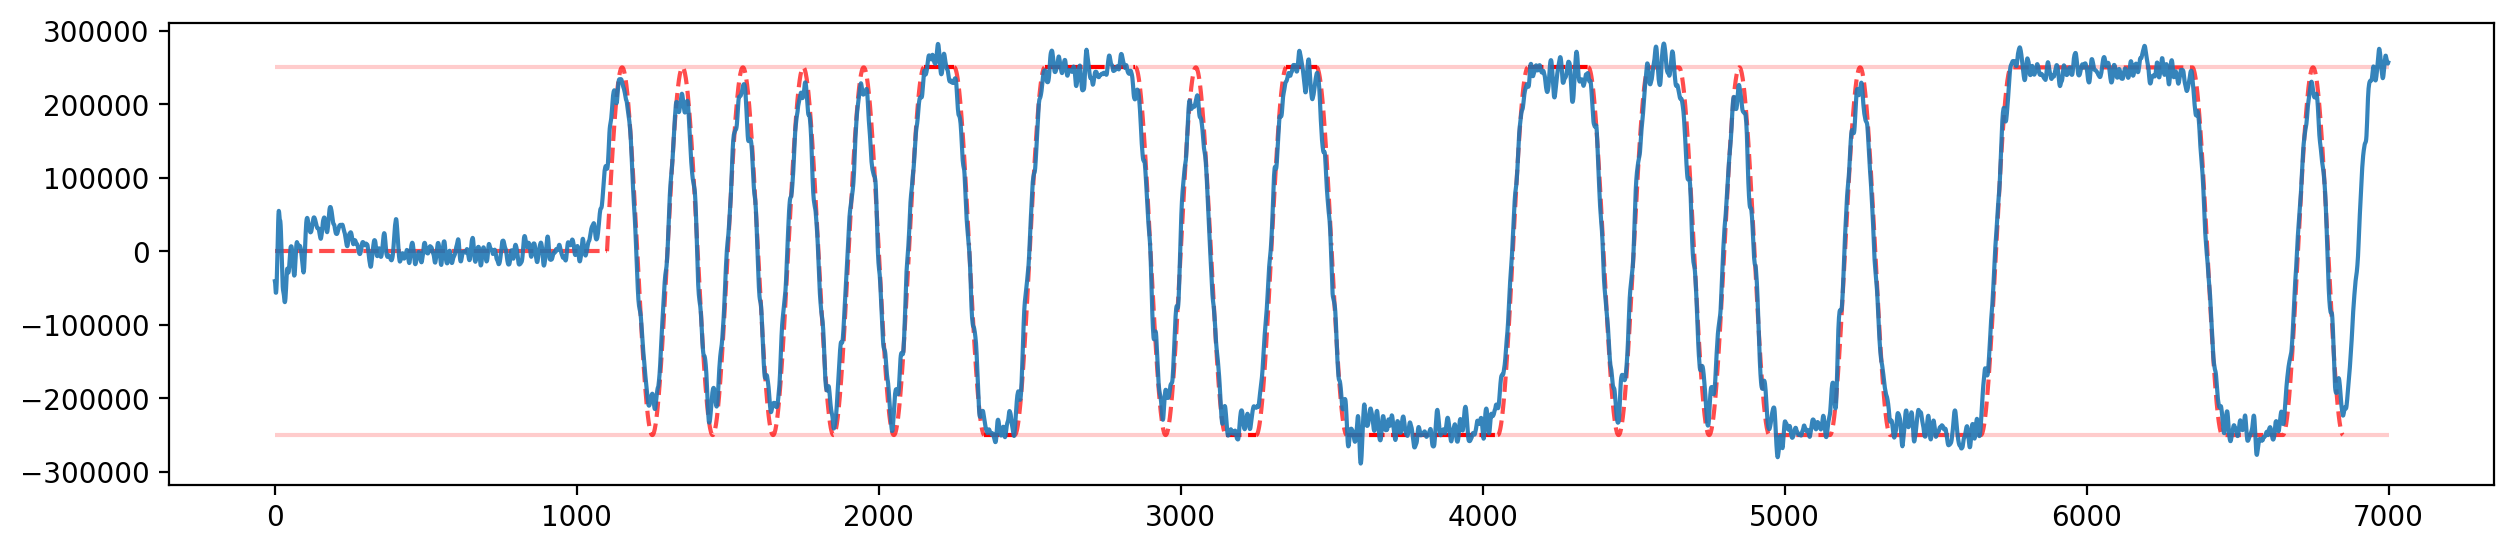

In [175]:
def scalePhaseGradientToHz(input, Fs = 100e6):
        return input * Fs / (2*np.pi)

IQ1.Fc= 2440000000.0 - 177000


plt.figure(figsize=(15,3),dpi=200)
plt.hlines(250e3,0, 7000,  color='r', alpha=0.2)
plt.hlines(-250e3,0, 7000,  color='r', alpha=0.2)

alpha = 0.7

plt.hlines(0,0,1100, linestyle='dashed', color='r',alpha=alpha)

t= np.arange(1000, len(IQ1.frameByNumber(0)), 1)
plt.plot(t[100:1100],250e3*np.sin(2*np.pi*500e3/100e6*t+np.pi)[100:1100], linestyle='dashed', color='r',alpha=alpha)

plt.plot(t[1100:1150],-250e3*np.sin(2*np.pi*500e3/100e6*t+np.pi)[0:50], linestyle='dashed', color='r',alpha=alpha)
plt.hlines(250e3,2150,2250, linestyle='dashed', color='r',alpha=1)
plt.plot(t[1250:1300],-250e3*np.sin(2*np.pi*500e3/100e6*t+np.pi)[50:100], linestyle='dashed', color='r',alpha=alpha)

plt.plot(t[1300:1350],250e3*np.sin(2*np.pi*500e3/100e6*t+np.pi)[0:50], linestyle='dashed', color='r',alpha=alpha)
plt.hlines(-250e3,2350,2450, linestyle='dashed', color='r',alpha=1)
plt.plot(t[1450:1500],250e3*np.sin(2*np.pi*500e3/100e6*t+np.pi)[50:100], linestyle='dashed', color='r',alpha=alpha)


plt.plot(t[1500:1550],250e3*np.sin(2*np.pi*500e3/100e6*t)[0:50], linestyle='dashed', color='r',alpha=alpha)
plt.hlines(250e3,2550,2850, linestyle='dashed', color='r',alpha=1)
plt.plot(t[1850:1900],-250e3*np.sin(2*np.pi*500e3/100e6*t+np.pi)[50:100], linestyle='dashed', color='r',alpha=alpha)


plt.plot(t[1900:2150],-250e3*np.sin(2*np.pi*500e3/100e6*t+np.pi)[100:350], linestyle='dashed', color='r',alpha=alpha)
plt.hlines(-250e3,3150,3250, linestyle='dashed', color='r',alpha=1)
plt.plot(t[2250:2300],250e3*np.sin(2*np.pi*500e3/100e6*t+np.pi)[50:100], linestyle='dashed', color='r',alpha=alpha)


plt.plot(t[2300:2350],-250e3*np.sin(2*np.pi*500e3/100e6*t+np.pi)[0:50], linestyle='dashed', color='r',alpha=alpha)
plt.hlines(250e3,3350,3450, linestyle='dashed', color='r',alpha=1)
plt.plot(t[2450:2500],-250e3*np.sin(2*np.pi*500e3/100e6*t+np.pi)[50:100], linestyle='dashed', color='r',alpha=alpha)


plt.plot(t[2500:2550],250e3*np.sin(2*np.pi*500e3/100e6*t+np.pi)[0:50], linestyle='dashed', color='r',alpha=alpha)
plt.hlines(-250e3,3550,4050, linestyle='dashed', color='r',alpha=1)
plt.plot(t[3050:3100],250e3*np.sin(2*np.pi*500e3/100e6*t+np.pi)[50:100], linestyle='dashed', color='r',alpha=alpha)


plt.plot(t[3100:3150],250e3*np.sin(2*np.pi*500e3/100e6*t)[0:50], linestyle='dashed', color='r',alpha=alpha)
plt.hlines(250e3,4150,4350, linestyle='dashed', color='r',alpha=1)
plt.plot(t[3350:3400],-250e3*np.sin(2*np.pi*500e3/100e6*t+np.pi)[50:100], linestyle='dashed', color='r',alpha=alpha)

x1 = -250e3*np.sin(2*np.pi*500e3/100e6*t+np.pi)[0:50]
x2 = -250e3*np.sin(2*np.pi*500e3/100e6*t+np.pi)[50:100]
x3 = 250e3*np.sin(2*np.pi*500e3/100e6*t+np.pi)[0:50]
x4 = 250e3*np.sin(2*np.pi*500e3/100e6*t+np.pi)[50:100]

x = 250e3*np.sin(2*np.pi*500e3/100e6*t+np.pi)[0:50]
x = np.concatenate([x, x4])
x = np.concatenate([x, x1])
x = np.concatenate([x, [250e3]*100])
x = np.concatenate([x,  x2])
x = np.concatenate([x, x3])
x= np.concatenate([x, x4])
x= np.concatenate([x, x1])
x= np.concatenate([x, x2])
x= np.concatenate([x, x3])
x= np.concatenate([x, [-250e3]*200])
x= np.concatenate([x, x4])
x= np.concatenate([x, x1])
x= np.concatenate([x, x2])
x= np.concatenate([x, x3])
x= np.concatenate([x, [-250e3]*300])
x= np.concatenate([x, x4])
x= np.concatenate([x, x1])
x= np.concatenate([x, [250e3]*600])
x= np.concatenate([x, x2])
x= np.concatenate([x, x3])
x = np.concatenate([x, [-250e3]*200])
x= np.concatenate([x, x4])
x= np.concatenate([x, x1])
x= np.concatenate([x, x2])
x= np.concatenate([x, x3])


# x= np.concatenate([x, x4])
# x= np.concatenate([x, x1])
# x= np.concatenate([x, [250e3]*800])
# x= np.concatenate([x, x2])
# x= np.concatenate([x, x3])
# x= np.concatenate([x, [-250e3]*200])
# x= np.concatenate([x, x4])
# x= np.concatenate([x, x1])
# x= np.concatenate([x, x2])
# x= np.concatenate([x, x3])

# x= np.concatenate([x, x4])
# x= np.concatenate([x, x1])
# x= np.concatenate([x, [250e3]*300])
# x= np.concatenate([x, x2])
# x= np.concatenate([x, x3])
# x= np.concatenate([x, [-250e3]*200])
# x= np.concatenate([x, x4])
# x= np.concatenate([x, x1])
# x= np.concatenate([x, x2])


plt.plot(t[3400:3400+len(x)],x, linestyle='dashed', color='r',alpha=alpha)

# plt.hlines(-250e3,2350,2450, linestyle='dashed', color='r',alpha=1)
# plt.plot(t[1450:1500],250e3*np.sin(2*np.pi*500e3/100e6*t+np.pi)[50:100], linestyle='dashed', color='r',alpha=alpha)



plt.plot(scalePhaseGradientToHz(
        np.gradient(IQ1.unwrapPhase(
                IQ1.phase(IQ1.filter(
                        IQ1.demodulate(0),
                          window_len=25,
                            window='hanning')))))[0:7000], alpha=0.9, )
